# **Preparation**

In [ ]:
# Lucas Brito Cordeiro - Python project for a department store
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# Load data
df = pd.read_csv('/content/dataset.csv')

In [ ]:
[x for x in range(10) if x < 5]

[0, 1, 2, 3, 4]

# **Question 1**

**Wich city have the biggest sales value of Products in the 'Office Supplies' Category?**

In [ ]:
q1 = df[df['Categoria'] == 'Office Supplies']
q1.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(1)

,Valor_Venda
Cidade,
New York City,68362.814


# **Question 2**

**What is the Total Sales by Order Date?**

*Demonstrate the result through a bar chart.*

<Axes: title={'center': 'Total de Vendas por Data do Pedido'}, xlabel='Data_Pedido', ylabel='Valor Total Vendido'>

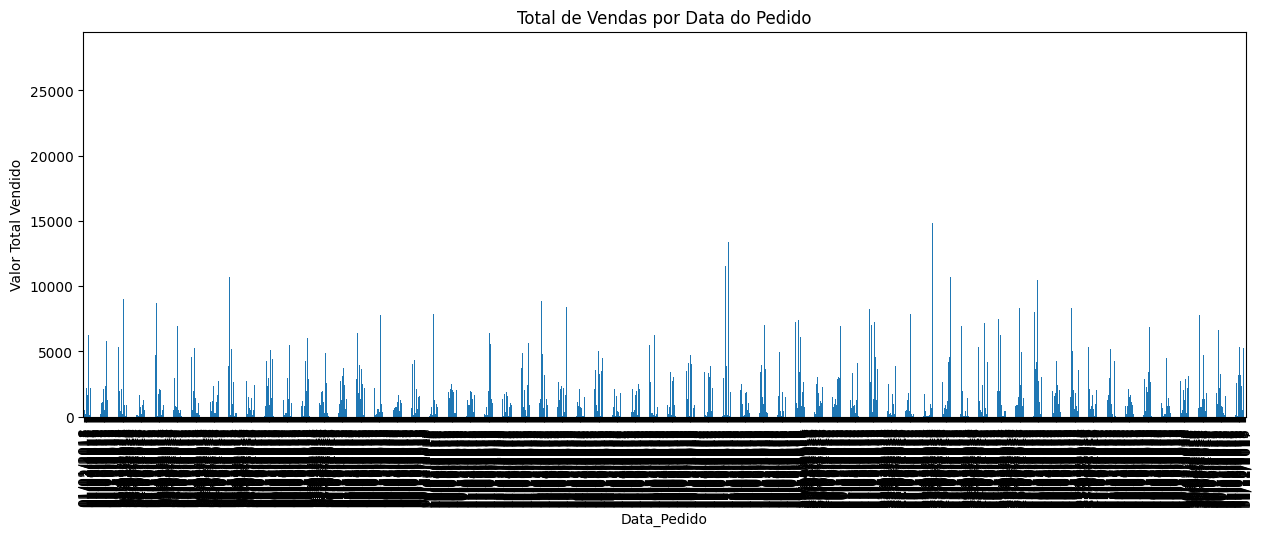

In [ ]:
q2 = df.groupby('Data_Pedido').sum()['Valor_Venda']
plt.xlabel('Data do Pedido')
plt.ylabel('Valor Total Vendido')
plt.title('Total de Vendas por Data do Pedido')
q2.plot(kind='bar', figsize=(15,5))

# **Question 3**

**What is the Total Sales by State?**

*Demonstrate the result through a bar chart.*

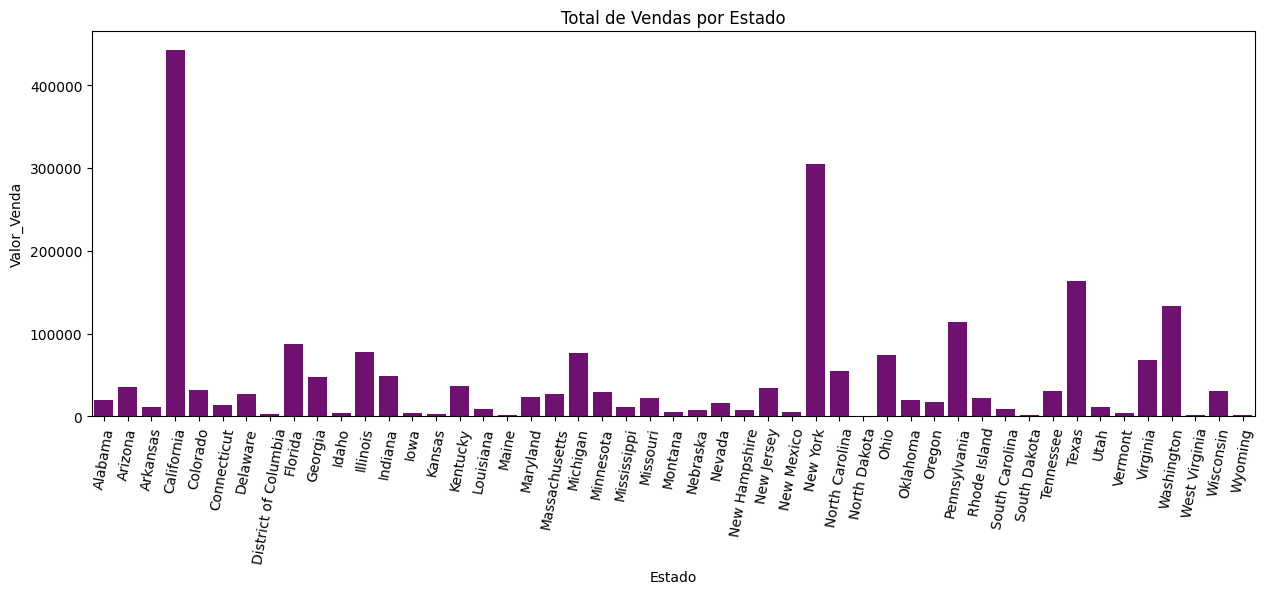

In [ ]:
q3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data = q3, x = 'Estado', y = 'Valor_Venda', color = 'purple').set(title = 'Total de Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

# **Question 4**

**What Are the 10 Cities with the Highest Total Sales?**

*Demonstrate the result through a bar chart.*

<Axes: title={'center': 'Total de Vendas por Cidade - Apenas as 10 com maior total de vendas'}, xlabel='Cidade', ylabel='Valor Total Vendido'>

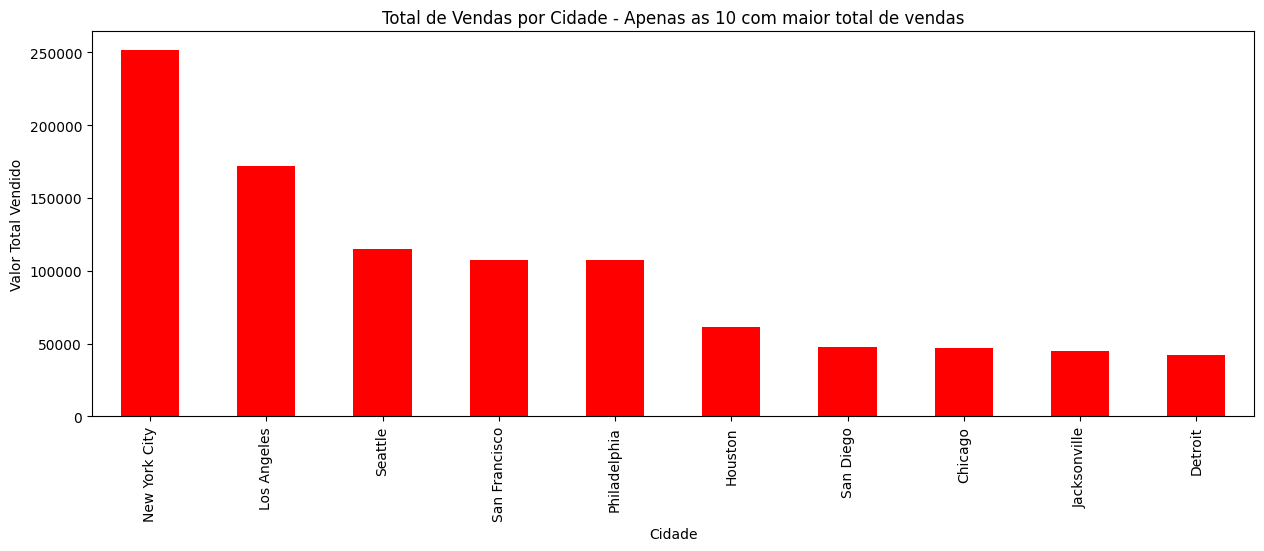

In [ ]:
q4 = df.groupby('Cidade').sum()['Valor_Venda'].sort_values(ascending=False).head(10)
plt.xlabel('Cidade')
plt.ylabel('Valor Total Vendido')
plt.title('Total de Vendas por Cidade - Apenas as 10 com maior total de vendas')
q4.plot(kind='bar', figsize=(15,5), color='red')

# **Question 5**

**Which segment had the highest total sales?**

*Demonstrate the result through a pie chart.*

In [ ]:
q5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)

# Function to convert data in absolute value
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return ' $ {v:d}'.format(v=val)
    return my_autopct

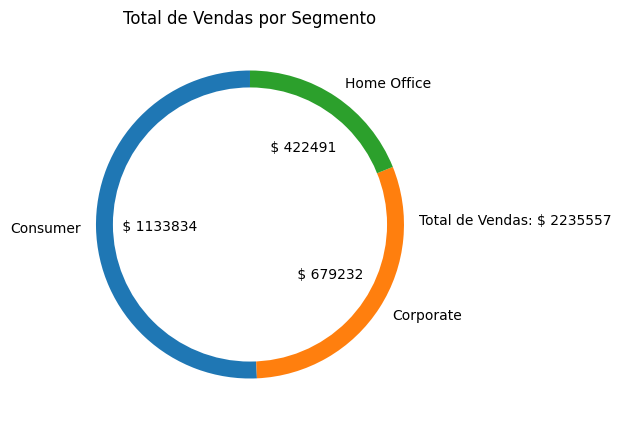

In [ ]:
# Plot
plt.figure(figsize=(15,5))

plt.pie(q5['Valor_Venda'],
        labels = q5['Segmento'],
        autopct = make_autopct(q5['Valor_Venda']),
        startangle = 90)

centre_circle = plt.Circle((0,0),0.89,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(q5['Valor_Venda']))), xy = (1.1, 0))
plt.title('Total de Vendas por Segmento')
plt.show()

# **Question 6**

**What is the Total Sales by Segment and by Year?**

In [ ]:
# Create the column of the year
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)
df['Ano'] = df['Data_Pedido'].dt.year
df.head(2)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017


In [ ]:
# Answering the Question
q6 = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
q6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

# **Question 7**

The company's managers are considering granting different discount ranges and would like to run a simulation based on the rule below:


*   If the Sales_Value is greater than 1000, a 15% discount is given.
*   If the Sales_Value is less than 1000, a 10% discount is given.


**How many Sales Would Receive a 15% Discount?**

In [ ]:
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df['Desconto'].value_counts()

,count
Desconto,
0.10,9243
0.15,457


# **Question 8**

Consider that the company decides to give a 15% discount on the previous item.

**What would be the average sales value before and after the discount?**

In [ ]:
df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])

before_discount = df.loc[df['Desconto'] == 0.15, 'Valor_Venda']
after_discount = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Desconto']

print('Average before discount: ', round(before_discount.mean(), 2))
print('Average after discount: ', round(after_discount.mean(), 2))

Average before discount:  2116.81
Average after discount:  1799.29


# **Question 9**

**What is the Average Sales by Segment, by Year and by Month?**

*Show the result using a line chart.*

In [ ]:
df['Mes'] = df['Data_Pedido'].dt.month
q9 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
q9

<ipython-input-44-4e9463fd0ceb>:2: FutureWarning: The provided callable <function sum at 0x7b9fcd56ae60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  q9 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
<ipython-input-44-4e9463fd0ceb>:2: FutureWarning: The provided callable <function mean at 0x7b9fcd56bd90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  q9 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
<ipython-input-44-4e9463fd0ceb>:2: FutureWarning: The provided callable <function median at 0x7b9fccf37490> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass th

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

<Figure size 1200x600 with 0 Axes>

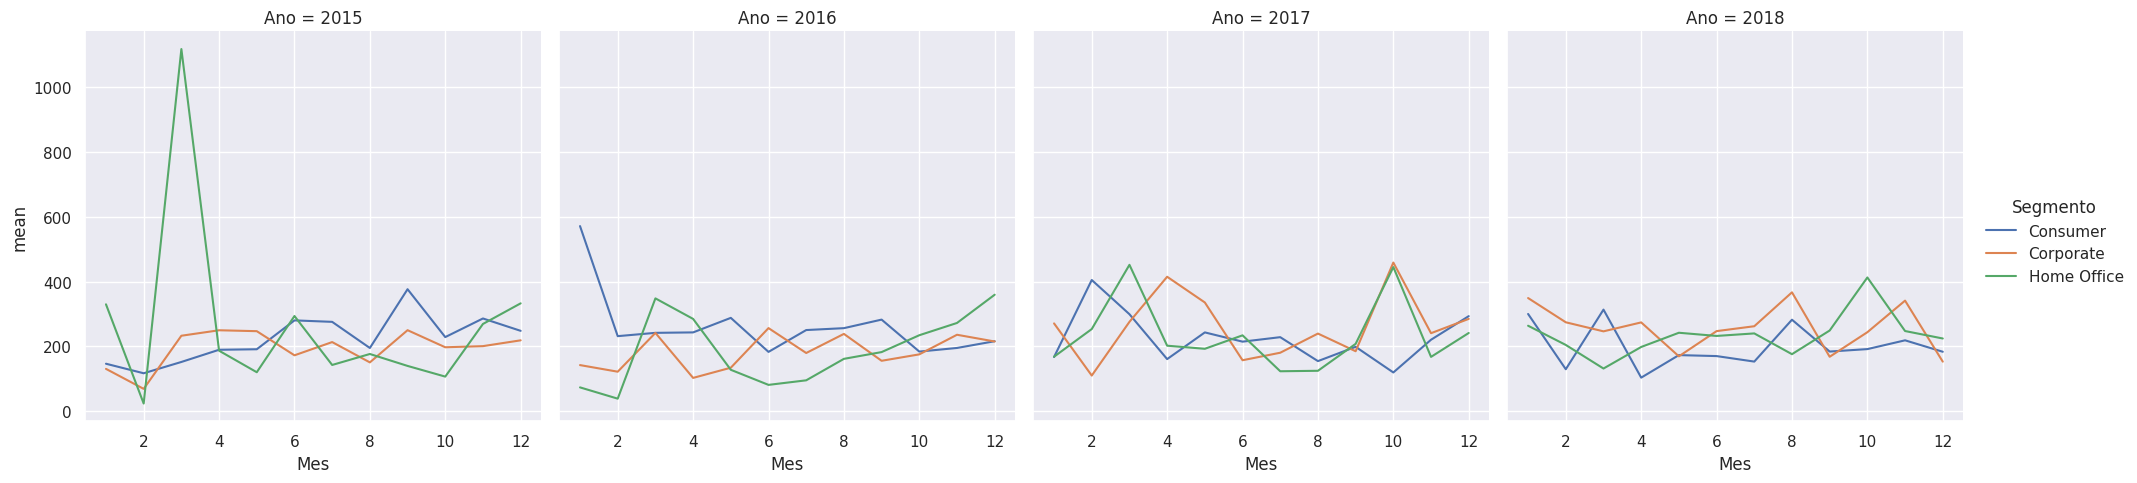

In [ ]:
# Extracting the levels
years = q9.index.get_level_values(0)
months = q9.index.get_level_values(1)
segments = q9.index.get_level_values(2)

# Plot
plt.figure(figsize=(12,6))
sns.set()
figq9 = sns.relplot(kind = 'line',
                   data = q9,
                   y = 'mean',
                   x = months,
                   hue = segments,
                   col = years,
                   col_wrap = 4)
plt.show()

# **Question 10**

**What is the Total Sales by Category and Subcategory, Considering Only the Top 12 Subcategories?**

*Show everything through a single chart.*

In [ ]:
# Group by category and subcategory and sum only the numerics variables
q10 = df.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending=False).head(12)

In [ ]:
# Convert the column Valor_Venda into integer and sort by category
q10 = q10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()
q10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [ ]:
# Another dataframe only with the sum by category
q10_cat = q10.groupby('Categoria').sum(numeric_only = True).reset_index()
q10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [ ]:
# Color lists
colors_category = ['#5d00de', '#0ee84f', '#e80e27']
colors_subcategory = ['#aa8cd4', '#aa8cd5', '#aa8cd6', '#aa8cd7', '#26c957', '#26c958', '#26c959', '#26c960', '#e65e65', '#e65e66', '#e65e67', '#e65e68']

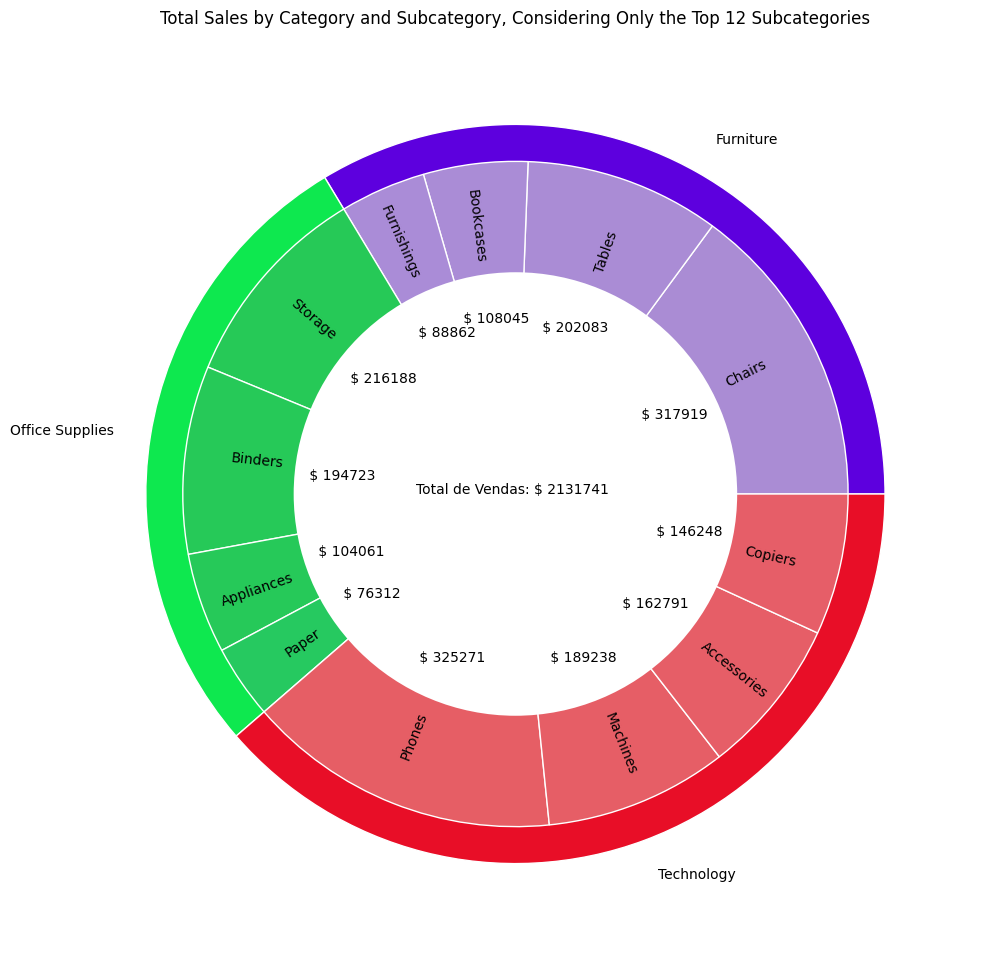

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(18,12))

# Category chart
p1 = ax.pie(q10_cat['Valor_Venda'],
            radius = 1,
            labels = q10_cat["Categoria"],
            wedgeprops = dict(edgecolor = 'white'),
            colors = colors_category)

# SubCategory Ccart
p2 = ax.pie(q10['Valor_Venda'],
            radius = 0.9,
            labels = q10['SubCategoria'],
            autopct = make_autopct(q10['Valor_Venda']),
            colors = colors_subcategory,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Clean the centre of the circle
centre_circle = plt.Circle((0,0), 0.6, fc = 'white')

# Labels
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(q10['Valor_Venda']))), xy = (-0.27, 0))
plt.title('Total Sales by Category and Subcategory, Considering Only the Top 12 Subcategories')
plt.show()
